<a href="https://colab.research.google.com/github/jonaleal/ModelosRNA-Kmeans/blob/main/Modelo_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/usuarios-twitter.csv")
X = df.copy()
y = df.copy()
df_copy = df.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
columnas_deseadas = ['co','ex','ag']
# Eliminar las columnas no deseadas
columnas_para_eliminar = [col for col in X.columns if col not in columnas_deseadas]
X.drop(columnas_para_eliminar, axis=1, inplace=True)
X.head()

,co,ex,ag
0,28.148819,41.948819,29.370315
1,20.525865,37.938947,24.279098
2,13.745417,38.999896,34.645521
3,15.377462,52.337538,31.082154
4,19.642258,48.530806,31.138871


In [ ]:
columnas_deseadas2 = ['categoria']
# Eliminar las columnas no deseadas
columnas_para_eliminar2 = [col for col in y.columns if col not in columnas_deseadas2]
y.drop(columnas_para_eliminar2, axis=1, inplace=True)
y.head()

,categoria
0,7
1,7
2,4
3,2
4,4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

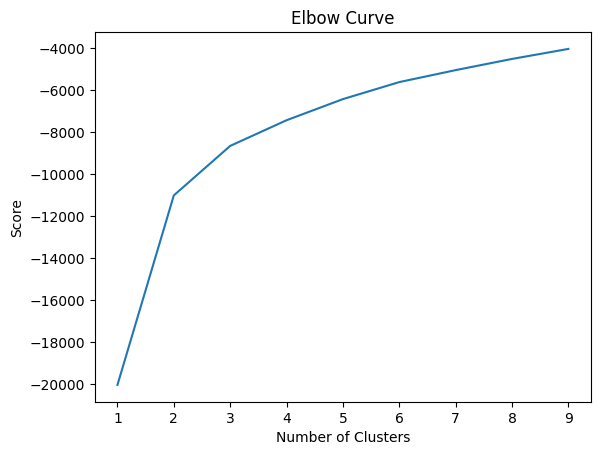

In [ ]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Según los datos originales debiamos obtener 9 clusters pero podemos ver al trazar la curva de Elbow que el numero optimo de clusters es 5 pues ahí notamos como la curva empieza a aplanarse

<ipython-input-103-950e1249459b>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster['co'], cluster['ex'], cluster['ag'], c=colors[i], label=f'Cluster {i + 1}')


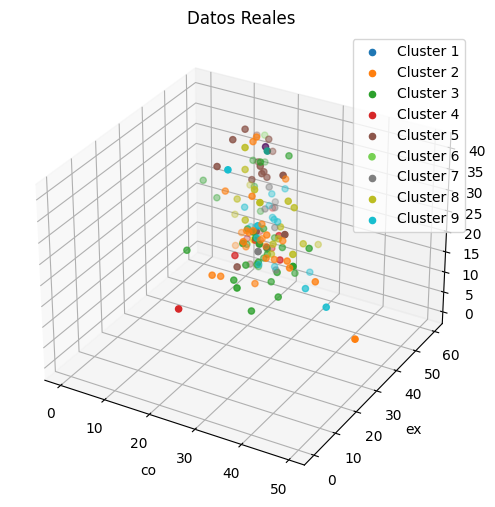

In [ ]:
# Crear un gráfico 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Asignar colores a los puntos basados en la etiqueta de cluster

colors = plt.cm.tab10(np.linspace(0, 1, 9))
for i in range(9):
    cluster = df_copy[df_copy['categoria'] == i]
    ax.scatter(cluster['co'], cluster['ex'], cluster['ag'], c=colors[i], label=f'Cluster {i + 1}')

# Configurar etiquetas y título
ax.set_xlabel('co')
ax.set_ylabel('ex')
ax.set_zlabel('ag')
ax.set_title('Datos Reales')

# Mostrar leyenda
ax.legend()

# Mostrar gráfico
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
#
labels = kmeans.predict(X)
#
C = kmeans.cluster_centers_
colors = ['blue', 'red', 'green', 'orange', 'purple']
asignar=[]
